Strings
====

The process of cleaning data for analysis often requires working with text, for example, to correct typos, convert to standard nomenclature and resolve ambiguous labels. In some statistical fields that deal with (say) processing electronic medical records, information science or recommendations based on user feedback, text must be processed before analysis - for example, by converting to a bag of words.


1. [Text wrangling](#wrangle)
2. [string modules](#modules)
<ol>
<li>os
<li>collections
</ol>
3. [Regular Expressions](#regex)
4. [Homework](#hmwk)

Working with text<a id="wrangle"></a>
====
One of Python’s strengths is the ease of working with text. Here are some examples.

In [1]:
from __future__ import division
import urllib

In [2]:
files=['negative.txt','positive.txt','obama_tweets.txt']
path='http://www.unc.edu/~ncaren/haphazard/'
for file_name in files:
     urllib.urlretrieve(path+file_name,file_name)

In [5]:
tweets = open("obama_tweets.txt").read()
tweets[:200]

'Obama has called the GOP budget social Darwinism. Nice try, but they believe in social creationism.\nIn his teen years, Obama has been known to use marijuana and cocaine.\nIPA Congratulates President Ba'

## How can we get a handle on all this text?

### String methods

In [6]:
tweets = tweets.split('\n')
tweets[:10]

['Obama has called the GOP budget social Darwinism. Nice try, but they believe in social creationism.',
 'In his teen years, Obama has been known to use marijuana and cocaine.',
 'IPA Congratulates President Barack Obama for Leadership Regarding JOBS Act: WASHINGTON, Apr 05, 2012 (BUSINESS W... http://t.co/8le3DC8E',
 'RT @Professor_Why: #WhatsRomneyHiding - his connection to supporters of Critical Race Theory.... Oh wait, that was Obama, not Romney...',
 'RT @wardollarshome: Obama has approved more targeted assassinations than any modern US prez; READ & RT: http://t.co/bfC4gbBW',
 'Video shows federal officials joking about cost of lavish conference http://t.co/2i4SmoPM #obama #crime #p2 #news #tcot #teaparty',
 'one Chicago kid who says "Obama is my man" tells Jesse Watters that the gun violence in Chicago is like "World War 17"',
 'RT @ohgirlphrase: American kid "You\'re from the UK? Ohhh cool, So do you have tea with the Queen?". British kid: "Do you like, go to Mcdonalds with Obam

In [7]:
print len(tweets)
tweets[:5]

1365


['Obama has called the GOP budget social Darwinism. Nice try, but they believe in social creationism.',
 'In his teen years, Obama has been known to use marijuana and cocaine.',
 'IPA Congratulates President Barack Obama for Leadership Regarding JOBS Act: WASHINGTON, Apr 05, 2012 (BUSINESS W... http://t.co/8le3DC8E',
 'RT @Professor_Why: #WhatsRomneyHiding - his connection to supporters of Critical Race Theory.... Oh wait, that was Obama, not Romney...',
 'RT @wardollarshome: Obama has approved more targeted assassinations than any modern US prez; READ & RT: http://t.co/bfC4gbBW']

In [10]:
# Average number of hashtags total?

sum([tweet.count('#') for tweet in tweets])/len(tweets)

0.6783882783882784

In [12]:
# Number of tweets with at least 1 #?

sum([tweet.find('#') != -1 for tweet in tweets])

469

In [13]:
print tweets[300]
print tweets[300].find('a')  # only first occurrence
print tweets[300].find('!')  # -1 if doesn't occur

White House in damage control over Obama Supreme Court remarks: The White House was forced on the defensive on W... http://t.co/2Yy8Srct
16
-1


In [14]:
tweets[300].replace('Obama', "Trump")

'White House in damage control over Trump Supreme Court remarks: The White House was forced on the defensive on W... http://t.co/2Yy8Srct'

### Split, Join, Strip

<ul>
<li>`Split` a string according to some character. This creates a list of strings out of the original string.
<li>`Join` a list of strings together according to some delimiter     
<li>`Strip` leading and trailing blanks around a word  
</ul>

In [15]:
objective = "Basic String Manipulation"
s = """
<ul>
  <li>`Split` a string according to some character. This creates a list of strings out of the original string. 
  <li>`Join` a list of strings together according to some delimiter     
  <li>`Strip` leading and trailing blanks around a word 
</ul>
"""
print s     # where's the newline characters?


<ul>
  <li>`Split` a string according to some character. This creates a list of strings out of the original string. 
  <li>`Join` a list of strings together according to some delimiter     
  <li>`Strip` leading and trailing blanks around a word 
</ul>



In [16]:
split_list = [i for i in s.split('\n')]
split_list[2:5]

['  <li>`Split` a string according to some character. This creates a list of strings out of the original string. ',
 '  <li>`Join` a list of strings together according to some delimiter     ',
 '  <li>`Strip` leading and trailing blanks around a word ']

In [17]:
strip_list = [i.strip('   <li>') for i in split_list[2:5]] # remove trailing space also
strip_list

['`Split` a string according to some character. This creates a list of strings out of the original string.',
 '`Join` a list of strings together according to some delimiter',
 '`Strip` leading and trailing blanks around a word']

In [18]:
tokenize = [i.split(' ') for i in strip_list]
print tokenize

[['`Split`', 'a', 'string', 'according', 'to', 'some', 'character.', 'This', 'creates', 'a', 'list', 'of', 'strings', 'out', 'of', 'the', 'original', 'string.'], ['`Join`', 'a', 'list', 'of', 'strings', 'together', 'according', 'to', 'some', 'delimiter'], ['`Strip`', 'leading', 'and', 'trailing', 'blanks', 'around', 'a', 'word']]


In [19]:
final_words = [i[0].strip('`') for i in tokenize]
final_words

['Split', 'Join', 'Strip']

In [20]:
" + ".join(final_words) + " = {}".format(objective)

'Split + Join + Strip = Basic String Manipulation'

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME!

Format your `PATH` variable such that it looks like mine:

```
=> bin=> sh
=> Users=> ilanman=> sparkapphelper=> scala-2.11.7=> bin=> bin
=> Users=> ilanman=> sparkapphelper=> spark=> spark-1.6.0-bin-hadoop2.6=> bin
=> Users=> ilanman=> sparkapphelper=> sbt=> sbt-0.13.11=> bin
=> Library=> Java=> JavaVirtualMachines=> jdk1.8.0_60.jdk=> Contents=> Home=> bin
=> usr=> local=> bin
=> usr=> bin
=> bin
=> usr=> sbin
=> sbin
=> opt=> X11=> bin
=> Library=> TeX=> texbin
No such file or directory
```

Note that Jupyter can access your terminal by entering `!` before regular terminal commands, i.e. `!mkdir newfolder`<br>

Here is my current `PATH`: !echo $PATH

`/Users/ilanman/spark/bin:/Users/ilanman/sbt/bin:/Library/Java/JavaVirtualMachines/jdk1.8.0_60.jdk/Contents/Home/bin`<br>
`/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/X11/bin:/Library/TeX/texbin`

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [21]:
## SOLUTION

paths = !`echo $PATH`
print paths     # paths is a list of strings
print len(paths)      # only 1 string
# pull out string(s) from list of strings
path_strings = paths[0]
print path_strings
all_paths = path_strings.split(':')  # split on : which is what separates paths
print all_paths
for path in all_paths:
    print '=> '.join(path.strip().split('/'))

['/bin/sh: /Users/ilanman/spark/bin:/Users/ilanman/sbt/bin:/Library/Java/JavaVirtualMachines/jdk1.8.0_60.jdk/Contents/Home/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/X11/bin:/Library/TeX/texbin: No such file or directory']
1
/bin/sh: /Users/ilanman/spark/bin:/Users/ilanman/sbt/bin:/Library/Java/JavaVirtualMachines/jdk1.8.0_60.jdk/Contents/Home/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/X11/bin:/Library/TeX/texbin: No such file or directory
['/bin/sh', ' /Users/ilanman/spark/bin', '/Users/ilanman/sbt/bin', '/Library/Java/JavaVirtualMachines/jdk1.8.0_60.jdk/Contents/Home/bin', '/usr/local/bin', '/usr/bin', '/bin', '/usr/sbin', '/sbin', '/opt/X11/bin', '/Library/TeX/texbin', ' No such file or directory']
=> bin=> sh
=> Users=> ilanman=> spark=> bin
=> Users=> ilanman=> sbt=> bin
=> Library=> Java=> JavaVirtualMachines=> jdk1.8.0_60.jdk=> Contents=> Home=> bin
=> usr=> local=> bin
=> usr=> bin
=> bin
=> usr=> sbin
=> sbin
=> opt=> X11=> bin
=> Library=> TeX=> texbin
N

## Assess positive or negative sentiment

In [22]:
positive = open("positive.txt").read()
positive

'abidance\nabidance\nabilities\nability\nable\nabove\nabove-average\nabundant\nabundance\nacceptance\nacceptable\naccessible\nacclaim\nacclaimed\naccolade\naccolades\naccommodative\naccomplishment\naccomplishments\naccordance\naccordantly\naccurate\naccurately\nachievable\nachievement\nachievements\nacknowledgement\nactive\nacumen\nadaptable\nadaptability\nadaptive\nadept\nadeptly\nadequate\nadherence\nadherent\nadhesion\nadmirable\nadmirer\nadmirable\nadmirably\nadmiration\nadmiring\nadmiringly\nadmission\nadmission\nadorable\nadored\nadorer\nadoring\nadoringly\nadroit\nadroitly\nadulatory\nadvanced\nadvantage\nadvantage\nadvantageous\nadvantages\nadvantages\nadventure\nadventure\nadventuresome\nadventurism\nadventurous\nadvice\nadvice\nadvisable\nadvocacy\naffable\naffability\naffably\naffection\naffection\naffectionate\naffinity\naffirmation\naffirmation\naffirmative\naffluent\naffluence\naffordable\nafloat\nagile\nagilely\nagility\nagreeable\nagreement\nagreement\nallowable\nallure

In [23]:
positive.split('\n')[:10]

['abidance',
 'abidance',
 'abilities',
 'ability',
 'able',
 'above',
 'above-average',
 'abundant',
 'abundance',
 'acceptance']

## What's the positive sentiment in the tweets?

<ul>
<li>Iterate through tweets and count occurrence of positive words. 
<li>Need to do a bit a cleaning first.
</ul>

In [24]:
tweets[0]

'Obama has called the GOP budget social Darwinism. Nice try, but they believe in social creationism.'

In [37]:
# The punctuation function is useful for getting rid of unwanted characters in a string
from string import punctuation
print punctuation

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


## os module

<ul>
<li>`os` module provides a way of using operating system dependent functionality. You can find important information about your location or about the process.
<li>We'll look at this in more detail next session
</ul>

In [27]:
import os

print os.getcwd()

/Users/ilanman/gdi


In [28]:
# Alice in Wonderland from Project Gutenberg

if not os.path.exists('alice.txt'):
    ! curl http://www.gutenberg.org/cache/epub/11/pg11.txt -O alice.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  163k  100  163k    0     0   105k      0  0:00:01  0:00:01 --:--:--  105k
curl: (6) Could not resolve host: alice.txt


In [29]:
!head -50 pg11.txt

## collections modules

<ul>
<li>Very useful module for text manipulation, analysis
<li>`OrderedDict`
<li>`defaultdict`
<li>`namedtuple`
<li>`Counter`
</ul>

In [30]:
alice = open('pg11.txt').read()  # read in file

# split words on spaces, remove punctuation and make lower case
words = alice.translate(None, punctuation).lower().split()

In [31]:
print len(words)
print len(set(words))

29386
3251


### How to find 10 most common words?

In [32]:
most_common = {}

# use set to find unique words, store in dictionary
for word in set(words):
    most_common.update({word : words.count(word)})

In [33]:
most_common

{'secondly': 2,
 'pardon': 6,
 'limited': 5,
 'copy': 12,
 'saves': 1,
 'bear': 1,
 'knelt': 1,
 'four': 6,
 'sleep': 6,
 'hanging': 3,
 'ringlets': 2,
 'oldest': 1,
 'hate': 1,
 'assembled': 2,
 'consider': 4,
 'whose': 2,
 'lory': 7,
 'calculate': 1,
 'paris': 2,
 'blacking': 1,
 'presents': 2,
 'yetits': 1,
 'certain': 5,
 'whatsoever': 2,
 'under': 22,
 'inwards': 1,
 'sorry': 1,
 'glovesthat': 1,
 'worth': 4,
 'updated': 2,
 'void': 1,
 'rise': 1,
 'every': 12,
 'govern': 1,
 'month': 2,
 'fireplace': 1,
 'school': 5,
 'prize': 1,
 'wooden': 1,
 'pinch': 2,
 'persisted': 2,
 'drawlingthe': 1,
 'wept': 1,
 'favoured': 1,
 'leaders': 1,
 'farmyardwhile': 1,
 'tired': 7,
 'feathers': 1,
 'direct': 1,
 'elegant': 1,
 'likely': 5,
 'louder': 1,
 'machines': 1,
 'shining': 1,
 'even': 21,
 'meekly': 2,
 'errors': 1,
 'hide': 1,
 'forgetting': 3,
 'solemn': 3,
 'thunder': 1,
 'near': 15,
 'poison': 3,
 'above': 3,
 'conduct': 1,
 'new': 8,
 'babythe': 1,
 'increasing': 1,
 'asis': 1,
 't

### To find top 10, need to sort dictionary on values. There are <em>MANY</em> ways to do this.

In [34]:
# using base python

sorted_words_lambda = sorted(most_common.items(), key = lambda x: x[1], reverse = True)
sorted_words_lambda[:10]

[('the', 1804),
 ('and', 912),
 ('to', 801),
 ('a', 684),
 ('of', 625),
 ('it', 541),
 ('she', 538),
 ('said', 462),
 ('you', 429),
 ('in', 428)]

In [35]:
# using itemgetter from operator module
from operator import itemgetter

sorted_words_itemgetter = sorted(most_common.items(), key = itemgetter(1), reverse = True)
sorted_words_itemgetter[:10]

[('the', 1804),
 ('and', 912),
 ('to', 801),
 ('a', 684),
 ('of', 625),
 ('it', 541),
 ('she', 538),
 ('said', 462),
 ('you', 429),
 ('in', 428)]

In [36]:
# using collections module
from collections import OrderedDict

sorted_words_collections = OrderedDict(sorted(most_common.items(), key = lambda x: x[1], reverse = True))
sorted_words_collections.items()[:10]

[('the', 1804),
 ('and', 912),
 ('to', 801),
 ('a', 684),
 ('of', 625),
 ('it', 541),
 ('she', 538),
 ('said', 462),
 ('you', 429),
 ('in', 428)]

In [37]:
# default dict

from collections import defaultdict
inverse = defaultdict( list )

for k, v in most_common.items():
    inverse[v].append( k )

for k in sorted(inverse,reverse=True)[:10]:
    print inverse[k][0], k

the 1804
and 912
to 801
a 684
of 625
it 541
she 538
said 462
you 429
in 428


In [38]:
# named tuple

from collections import namedtuple

sorted_words_named = namedtuple('word', 'word count')
sorted_words_named = sorted([sorted_words_named(v,k) for (k,v) in most_common.items()], reverse=True)
sorted_words_named[:10]

[word(word=1804, count='the'),
 word(word=912, count='and'),
 word(word=801, count='to'),
 word(word=684, count='a'),
 word(word=625, count='of'),
 word(word=541, count='it'),
 word(word=538, count='she'),
 word(word=462, count='said'),
 word(word=429, count='you'),
 word(word=428, count='in')]

In [39]:
# using Counter

from collections import Counter

sorted_words_counter = [item for item in Counter(words).most_common(10)]
sorted_words_counter[:10]

[('the', 1804),
 ('and', 912),
 ('to', 801),
 ('a', 684),
 ('of', 625),
 ('it', 541),
 ('she', 538),
 ('said', 462),
 ('you', 429),
 ('in', 428)]

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME!

Find the number of words that appear exactly 10 times in the book. Use a python module.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [40]:
## SOLUTION

alice_counter = Counter(alice.split())
[(k, v) for (k, v) in alice_counter.items() if v==10]

[('where', 10),
 ('Hatter,', 10),
 ('small', 10),
 ('us', 10),
 ('walked', 10),
 ('having', 10),
 ('thinking', 10),
 ('read', 10),
 ('They', 10),
 ('keep', 10),
 ('up,', 10),
 ('against', 10),
 ('talk', 10),
 ('voice.', 10),
 ('enough', 10),
 ('sitting', 10),
 ('done', 10),
 ('most', 10),
 ('access', 10),
 ('paragraph', 10),
 ('United', 10),
 ('few', 10)]

## Find positive sentiment from tweets

<ul>
<li>Helpful to standardize tweets
<li>Convert to lower case
<li>Remove punctuation
</ul>

In [38]:
positive_word_dict = {}

for tweet in tweets:
    for positive_word in positive.split('\n')[::-1][1:]:
        if positive_word in tweet.translate(None, punctuation).lower():
            positive_word_dict[positive_word] = positive_word_dict.get(positive_word, 0)
            positive_word_dict[positive_word] += 1

In [39]:
sorted(positive_word_dict.items())[:10]

[('ability', 2),
 ('able', 14),
 ('accomplishment', 1),
 ('accomplishments', 1),
 ('active', 4),
 ('advantage', 10),
 ('agreement', 10),
 ('amazing', 1),
 ('ample', 1),
 ('angel', 2)]

## Find the most common positive word used in the tweets

In [40]:
[item for item in Counter(positive_word_dict).most_common(1)]

[('just', 174)]

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME!

Do a similar analysis above but using negative words. 

1) Read in the `negative.txt` file and store it in a variable call it `negative`.<br>
2) Using `negative`, find the 10 most common negative words in the tweets. Comment on any interesting observations.<br>
3) For the most common negative word, print 10 tweets that contain it. Comment on any interesting observations.


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [41]:
## SOLUTION

negative = open("negative.txt").read()
negative_word_dict = {}

for tweet in tweets:
    for negative_word in negative.split('\n')[::-1][1:]:
        if negative_word in tweet.translate(None, punctuation).lower():
            negative_word_dict[negative_word] = negative_word_dict.get(negative_word, 0)
            negative_word_dict[negative_word] += 1

negative_counts = [item for item in Counter(negative_word_dict).most_common(10)]
print negative_counts

counter = 0
for tweet in tweets:
    if negative_counts[0][0] in tweet.translate(None, punctuation).lower():
        counter += 1
        if counter <= 10:
            print tweet
            print 80*'-'
        else:
            break

[('ill', 330), ('din', 241), ('sin', 162), ('lie', 156), ('mar', 136), ('war', 106), ('need', 68), ('hell', 63), ('rat', 61), ('wee', 47)]
Here's How Obama and the Democrats Will Win in 2012: Let's start by going back to the assorted polls questioning... http://t.co/zpg0TVm3
--------------------------------------------------------------------------------
RT @GregWHoward: Obama inherited (if you want to use his lame wording) $10.6 trillion in debt and turned it into $15.2 trillion. #tcot #p2 #ocra #teaparty
--------------------------------------------------------------------------------
If Obama win 2012 Election wait til 2016 he will have full white hair! just like Bill clinton!
--------------------------------------------------------------------------------
RT @BunkerBlast: RT @teacherspets Obama's Budget: 'Interest Payments Will Exceed Defense Budget' in 2019  http://t.co/uddCXCjt
--------------------------------------------------------------------------------
@edshow If Obama is a "

## What happened??

Regular Expression <a id="regex"></a>
-----

<ul>
<li>Special sequence of characters that helps you match (**exact!**) or find other strings or sets of strings, using a specialized syntax held in a pattern
<li>Regular expressions as a concept is not exclusive to Python at all.
<li>Regular expressions are widely used in UNIX world.
<li>`re` module
        <ul>
        <li>`re.compile()`
        <li>`re.match()`
        <li>`re.search()`
        <li>`re.findall()`
        <li>`re.sub()`
        </ul>
<li>In python, regular expressions tend to be **very slow**. So only use if necessary.
</ul>

In [42]:
from re import match, search, findall, compile, sub

In [43]:
# python treats / as an escape character. So "/n" is a newline object, not a literal '/n'
# to de-pythonify a string, add r' to the front - this makes it a raw string

string = 'This is a\nnormal string with a newline and \ttab character'
rawString = r'and this is a\nraw string which can be used to search for \tpatterns'
print string
print "+++++++++++++++++"
print rawString

This is a
normal string with a newline and 	tab character
+++++++++++++++++
and this is a\nraw string which can be used to search for \tpatterns


#### `match` - only find matches if they occur at the start of the string being searched.

In [44]:
test_string = "I'm learning about regular expressions and about how to use them in Python. This is fantastic stuff!"

In [45]:
match_pattern = match("I'm", test_string) # return pattern matched by query
print match_pattern
print match_pattern.group()

I'm


In [46]:
print match("about", test_string)

None


#### `search` - similar to `match`, but `search` doesn’t restrict us to only finding matches at the beginning of the string. But will only return the first result

In [47]:
search_pattern = search('about', test_string)
print search_pattern
search_pattern.group()

'about'

#### `findall` - get a list of all matching patterns

In [48]:
findall('about',test_string)

['about', 'about']

In [49]:
findall('an',test_string)  # no good

['an', 'an']

In [50]:
findall(' an ',test_string)  # kinda hacky

[]

In [51]:
word = 'about'
findall(r'\b' + word + r'\b', test_string)  # better

['about', 'about']

In [52]:
word = 'about'
test_string.count(word)  # count() is ok for simple searches

2

#### Use `compile` to create regular expressions that you can then `search`, `findall`, `match`, ...

In [53]:
word = 'about'
expr = compile(r'\b' + word + r'\b')  # can get complex
print findall(expr, test_string)

['about', 'about']


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME!

Redo the negative tweet exercise from above to perform exact matching. That is:<br>

1) Using negative, find the 10 most common negative words in the tweets. Comment on any interesting observations.<br>
2) For the most common negative word, print 10 tweets that contain it. Comment on any interesting observations.

In [54]:
## SOLUTION

negative = open("negative.txt").read()
negative_word_dict = {}

for tweet in tweets:
    for negative_word in negative.split('\n')[::-1][1:]:  # Since the last item is a ' ', reverse the list and skip it
     
    #    Note that you could also use count() - this is much faster
        num_occurence = tweet.translate(None, punctuation).lower().count(' ' + negative_word + ' ')
    
        # Unlike the previos exercise - here we increment the dictionary by the number of occurences, 
        # not just 1 for each occurence
    #    num_occurence = len(findall(r'\b' + negative_word + r'\b', tweet.translate(None, punctuation).lower()))
        
        if num_occurence > 0:
            negative_word_dict[negative_word] = negative_word_dict.get(negative_word, 0)
            negative_word_dict[negative_word] += num_occurence

most_negative = [item for item in Counter(negative_word_dict).most_common(10)]
print most_negative

counter = 0
# store most negative word as a regular expression
regex = compile(r'\s' + most_negative[0][0] + '\s')

for tweet in tweets:
    # search returns a true or false
    if search(regex, tweet.translate(None, punctuation).lower()):
        counter += 1
        if counter <= 10:
            print tweet
            print 80*'-'   # add dashed line for easier reading
        else:
            break

[('need', 52), ('bully', 32), ('racist', 24), ('dumb', 20), ('war', 20), ('rumors', 20), ('against', 14), ('trying', 13), ('down', 12), ('blame', 12)]
@JoeSixpackSays Our Troops NEED TO COME HOME !!!! BRING OUR TROOPS HOME NOW OBAMA YOU BASTARD OOOORAH SEMPER FI
--------------------------------------------------------------------------------
@billmaher Mr Maher I just seen the HBO documentary hot coffee.I feel so upset, we need four more years of President Obama 1000% certtain!
--------------------------------------------------------------------------------
@WilliamShatner  I just seen the HBO documentary hot coffee.I feel so upset, we need four more years of President Obama 1000% certtain!!!
--------------------------------------------------------------------------------
RT @BelleInABow: Obama doesn't need to be your favorite person, but he's still the President of the United States of America. That always deserves respect.
-------------------------------------------------------------

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# What is the distribution of negative word occurrence?

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

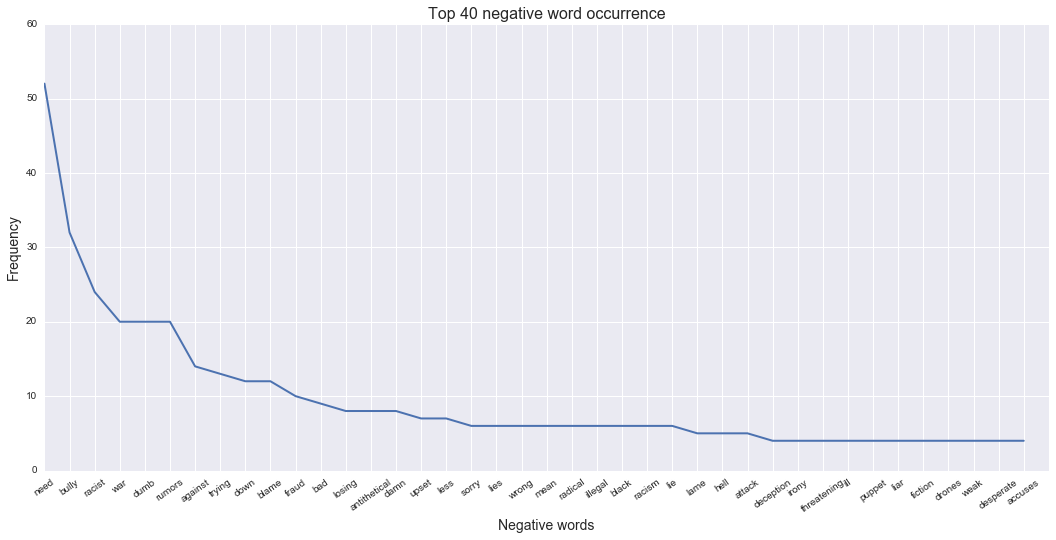

In [56]:
df = pd.DataFrame.from_dict(negative_word_dict,orient = 'index')
df.columns = ['num']
df.sort_values(by = ['num'], inplace = True, ascending = False)

plt.figure(figsize=(18,8))
plt.plot(df.num.values[:40],linewidth=2)
plt.xticks(range(len(df.index.values))[:40], df.index.values[:40],rotation=35)
plt.title("Top 40 negative word occurrence",size=16)
plt.ylabel("Frequency",size=14)
plt.xlabel("Negative words",size=14)
pass

## n-grams

<ul>
<li>Single word counts is ok, but for richer text analysis might want combinations of words
<li>bi-grams, tri-grams, ..., n-grams
</ul>

In [38]:
# example of bi grams of first tweet

tweet = tweets[0].split(' ')
bigrams = []

for i in range(len(tweet)-1): # need to stop 1 element before the end
    bigrams.append((tweet[i], tweet[i+1]))

In [39]:
bigrams

[('Obama', 'has'),
 ('has', 'called'),
 ('called', 'the'),
 ('the', 'GOP'),
 ('GOP', 'budget'),
 ('budget', 'social'),
 ('social', 'Darwinism.'),
 ('Darwinism.', 'Nice'),
 ('Nice', 'try,'),
 ('try,', 'but'),
 ('but', 'they'),
 ('they', 'believe'),
 ('believe', 'in'),
 ('in', 'social'),
 ('social', 'creationism.')]

In [40]:
# example of trigrams of first tweet

tweet = tweets[0].split(' ')
trigrams = []

for i in range(len(tweet)-2):
    trigrams.append((tweet[i], tweet[i+1], tweet[i+2]))

In [41]:
trigrams

[('Obama', 'has', 'called'),
 ('has', 'called', 'the'),
 ('called', 'the', 'GOP'),
 ('the', 'GOP', 'budget'),
 ('GOP', 'budget', 'social'),
 ('budget', 'social', 'Darwinism.'),
 ('social', 'Darwinism.', 'Nice'),
 ('Darwinism.', 'Nice', 'try,'),
 ('Nice', 'try,', 'but'),
 ('try,', 'but', 'they'),
 ('but', 'they', 'believe'),
 ('they', 'believe', 'in'),
 ('believe', 'in', 'social'),
 ('in', 'social', 'creationism.')]

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME

1. Write your own bigram function. Do this without using a for loop
2. Do the same for tri grams.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [62]:
## SOLUTION


def bigrams(twt):
    return zip(twt, twt[1:])

print bigrams(tweet)
print

def trigrams(twt):
    return zip(twt, twt[1:], twt[2:])

print trigrams(tweet)

[('Obama', 'has'), ('has', 'called'), ('called', 'the'), ('the', 'GOP'), ('GOP', 'budget'), ('budget', 'social'), ('social', 'Darwinism.'), ('Darwinism.', 'Nice'), ('Nice', 'try,'), ('try,', 'but'), ('but', 'they'), ('they', 'believe'), ('believe', 'in'), ('in', 'social'), ('social', 'creationism.')]

[('Obama', 'has', 'called'), ('has', 'called', 'the'), ('called', 'the', 'GOP'), ('the', 'GOP', 'budget'), ('GOP', 'budget', 'social'), ('budget', 'social', 'Darwinism.'), ('social', 'Darwinism.', 'Nice'), ('Darwinism.', 'Nice', 'try,'), ('Nice', 'try,', 'but'), ('try,', 'but', 'they'), ('but', 'they', 'believe'), ('they', 'believe', 'in'), ('believe', 'in', 'social'), ('in', 'social', 'creationism.')]


Homework<a id="hmwk"></a>
====

**Q1**.

Write a function to remove vowels from a string. Stick to base python only.

In [57]:
## SOLUTION

def remove_vowels(s):
    vowels = "aeiouAEIOU"
    s_without_vowels = ""
    for letter in s:
        if letter not in vowels:
            s_without_vowels += letter
    return s_without_vowels

remove_vowels('This sentence has no vowels. Cray cray!')

'Ths sntnc hs n vwls. Cry cry!'

#### Q2. 
For the next few questions, read in `Through the Looking glass` from Project Gutenberg (`pg12.txt`). 

In [58]:
import os

if not os.path.exists('alice.txt'):
    ! curl http://www.gutenberg.org/cache/epub/12/pg12.txt -O alice.txt        

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  181k  100  181k    0     0   255k      0 --:--:-- --:--:-- --:--:--  255k
<html>
<head><title>301 Moved Permanently</title></head>
<body bgcolor="white">
<center><h1>301 Moved Permanently</h1></center>
<hr><center>nginx</center>
</body>
</html>


In [59]:
poem = open('pg12.txt').read()  # read in file

**A)**. Print the subset starting from `'JABBERWOCKY'` and ending with `'It seems very pretty.'`

In [61]:
start = poem.find('JABBERWOCKY')
end = poem.find('It seems very pretty', start, end)
poem = poem[start:end - 1]

NameError: name 'end' is not defined

In [ ]:
print poem

**B)**. Print all *distinct* palindromic words, if any. Remember to 'standardize' first.

In [ ]:
## SOLUTION

import string
poem = poem.lower()
poem = poem.translate(None, string.punctuation)
words = poem.split()

def is_palindrome(word):
    return word == word[::-1] 

print set(word for word in words if is_palindrome(word))

**C)**. Find all possible sequences of 3 words in the poem. This is called a trigram. (Hint: use `zip` or `islice` from `itertools`)

In [ ]:
## SOLUTION 1
list(zip(words[:-2], words[1:-1], words[2:]))[:10]

In [ ]:
## SOLUTION 2
import itertools

def window(x, n):
    """Sliding widnow of size n from iterable x."""
    s = (itertools.islice(x, i, None) for i in range(n))
    return zip(*s)

list(window(words, 3))[:10]

**Q3**.

Plot a similar distribution for the positive word count. The differences are:

<ul>
<li>Plot top 30 positive words only
<li>Change the figure size
<li>Change the rotation of the xticks
<li>Change the linewidth and color
</ul>

Feel free to use the existing code as a template.<br>

As an extra challenge, instead of plotting the count of each positive word in ascending order, plot the cumulative count of the positive words, as a % of the total count of positive words, for the first 30. Your chart should look something like this:

<img id="cumulative" src="cumulative.png"/>




In [ ]:
## SOLUTION

df = pd.DataFrame.from_dict(positive_word_dict,orient = 'index')
df.columns = ['num']
df.sort_values(by = ['num'], inplace = True, ascending = False)

plt.figure(figsize=(10,4))
plt.plot(df.num.values[:30],linewidth=3,color='red')
plt.xticks(range(len(df.index.values))[:30], df.index.values[:30],rotation=35)
plt.title("Top 30 positive word occurrence",size=16)
plt.ylabel("Frequency",size=14)
plt.xlabel("Positive words",size=14)
pass

In [ ]:
df = pd.DataFrame.from_dict(positive_word_dict,orient = 'index')
df.columns = ['num']
df.sort_values(by = ['num'], inplace = True, ascending = False)

df['cumulative_proportion'] = np.cumsum(df.num).values/sum(df.num.values)

plt.figure(figsize=(10,4))
plt.plot(df['cumulative_proportion'].values[:30],linewidth=3,color='red')
plt.xticks(range(len(df.index.values))[:30], df.index.values[:30],rotation=35)
plt.title("Top 30 positive word occurrence",size=16)
plt.ylabel("Frequency",size=14)
plt.xlabel("Positive words",size=14)
pass

# BONUS QUESTION!

**Q1**. Encode and decode `Through the Looking Glass` using a [Caesar cipher](https://en.wikipedia.org/wiki/Caesar_cipher) <br>

Hint: create a function `encode(poem, shift)` where `shift` is the number of characters used to encode the cipher. It should return the encoded poem. Can you also use this function to return the decoded cipher? Check out the `maketrans` function in `string`

In [ ]:
## SOLUTION
import string

def encode(poem, shift):
    
    shifted_alphabet = string.ascii_lowercase[shift:] + string.ascii_lowercase[:shift]
    table = string.maketrans(string.ascii_lowercase, shifted_alphabet)
    
    return poem.translate(table)

In [ ]:
# Encode

cipher = encode(poem, 2)
print(cipher)

In [ ]:
# Decode

recovered = encode(cipher, -2)
print(recovered)